# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [ ]:
import pandas as pd

In [ ]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"Smartphone": ["iPhone 11", "Samsung Galaxy S20", "Google Pixel 4", "LG V60", "Nokia 9", "Sony Xperia 1", "iPhone SE"], "Price": [700,1000,800,700,450,1000,399]})
sample_df

,Smartphone,Price
0,iPhone 11,700
1,Samsung Galaxy S20,1000
2,Google Pixel 4,800
3,LG V60,700
4,Nokia 9,450
5,Sony Xperia 1,1000
6,iPhone SE,399


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from the "Smartphone" column that have a value of 700 in the "Price" column.


Follow along with the **live coding activity** to see how this works.

In [ ]:
# This code selects all values from the first column, "Smartphone" where the value on that same row in the second column, "Price" is equal to 700
sample_df["Smartphone"].loc[sample_df["Price"] == 700]

0    iPhone 11
3       LG V60
Name: Smartphone, dtype: object

Now you try! Let's say you want to view some more expensive phones. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is equal to 1000.

In [ ]:
sample_df["Smartphone"].loc[sample_df["Price"] == 1000]

1    Samsung Galaxy S20
5         Sony Xperia 1
Name: Smartphone, dtype: object

Let's say you definitely want an iPhone of some sort, but you want to see just iPhone prices. Now select all the values from the "Price" column where the value on that same row in the "Smartphone" column contains the word "iPhone".

In [ ]:
sample_df["Price"].loc[sample_df["Smartphone"].str.contains("iPhone")]

0    700
6    399
Name: Price, dtype: int64

Let's say you're on a budget and don't want to spend more than $700 on a phone. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is less than or equal to 700.

In [ ]:
sample_df["Smartphone"].loc[sample_df["Price"] <= 700]

0    iPhone 11
3       LG V60
4      Nokia 9
6    iPhone SE
Name: Smartphone, dtype: object

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You will need to import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# You can use this function in your code to find the log of distance:
# np.log10()

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/oh_table.csv")
df


,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.60,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10601,10593,5303536805217274496,TYC 8590-295-1,134.972845,-57.791584,8.2914,121.164,9.227,8.411,NaN,NaN,NaN,4552,2
10602,10592,6222217287487746432,TYC 6757-132-1,219.058488,-28.156905,9.2928,107.850,10.580,9.428,20030807_1442m28_040,-35.48,4.58,4553,2
10603,10594,6222223437880906496,TYC 6753-233-1,218.954194,-28.045241,10.2215,98.435,10.506,9.274,NaN,NaN,NaN,4553,2
10604,10597,3194970268200573824,TYC 5305-675-1,59.289288,-8.483433,5.0950,197.926,10.346,9.438,NaN,NaN,NaN,4554,2


In [ ]:
np.log10(df["distance"])

0        2.113773
1        2.122403
2        2.172463
3        2.120044
4        2.127733
           ...   
10601    2.083374
10602    2.032820
10603    1.993150
10604    2.296503
10605    2.293212
Name: distance, Length: 10606, dtype: float64

In [ ]:
Absolute_Magnitude = (df["G"] - 5 * np.log10(df["distance"]))
print(Absolute_Magnitude)

0        0.591135
1       -1.546013
2       -0.597314
3       -1.351220
4        0.914335
           ...   
10601   -1.189868
10602    0.415899
10603    0.540252
10604   -1.136514
10605   -1.729061
Length: 10606, dtype: float64


In [ ]:
Color = (df["G"] - df["J"])
print(Color)

0        1.176
1        0.929
2        0.998
3        0.813
4        1.457
         ...  
10601    0.816
10602    1.152
10603    1.232
10604    0.908
10605    0.982
Length: 10606, dtype: float64


0

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [ ]:
df.head(5)

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [ ]:
G = df["G"].loc[df["group_id"] == 2]
J = df["J"].loc[df["group_id"] == 2]
D = df["distance"].loc[df["group_id"] == 2]

Absolute_Magnitude = (G - 5 * np.log10(D))
Color = (G - J)

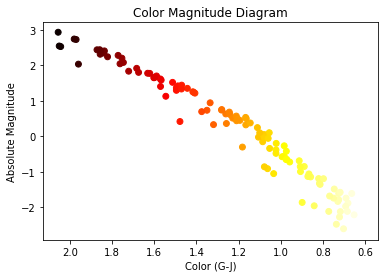

In [ ]:
cm = plt.cm.get_cmap("hot_r")
plt.gca().invert_yaxis()
plt.scatter(Color, Absolute_Magnitude, c=G-J, s=35, cmap=cm)
#plt.scatter(Color[24], Absolute_Magnitude[24], c='magenta', s=200, marker='*') 
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude')
plt.title('Color Magnitude Diagram')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

## 🟢Mini Project (Bonus): The Cultural-Societal Impact of the Lack of Access to Home Broadband

Electromagnetic waves that have wavelengths that are larger than 1mm in length are typically called radio waves. These wavelengths are used for communication between mobile phones, radio stations, Bluetooth devices, and of course radio stations.

Radio astronomers developed an understanding of radio waves, which provided huge advantage for the development of the high-speed WI-FI standard. In the early 1990’s, WI-FI speed was limited by errors created from the signal bouncing and echoing off walls and objects of a room. This problem was made worse when a lot of information was sent across a single pure tone (single frequency) sine-like radio waves, limiting the possible data WI-FI data rate. However, it was found that by spreading the load of information across the radio band, the echo was reduced. It was not until the mid 2000s that this standard had become main-stream in WI-FI technology.


In modern times, Wi-Fi is crucial to everyday activities whether it be work, school, or retail. But, who has access to Wi-Fi and who doesn't? Create a dataframe using the following access-based-on-income vs. time data, and create a scatter plot that visualizes how they compare.

Source: https://www.pewresearch.org/internet/fact-sheet/internet-broadband/?menuItem=2ab2b0be-6364-4d3a-8db7-ae134dbc05cd

In [ ]:
#Import necessary libraries

In [ ]:
#Read in data.

In [ ]:
#Store column data in variables.

In [ ]:
#Plot information


In your presentation, share your created visualizations above and your answers to the following questions along with any thoughts you have about the mini project.

Answer the following questions:

1. What income group of households has the greatest access to internet? The smallest?

2. True or False: Equality exists because everyone has the opportunity to pay for internet access in their household. <br> Explain your thoughts.

3. What are some ways that we can use our computer science skills to boost access of lower-income households to a stable high-speed internet connection?